**The goal of this data exploration is to find relationships between:**
* Spending and Performance
* Enrollment and Performance
* Spending and Enrollment

*Specifically for the State of California
To be expanded to other nearby states.*


In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import plotly.plotly as py
import plotly.graph_objs as go

# MatPlotlib
from matplotlib import pylab

# Scientific libraries
from scipy.optimize import curve_fit

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['enroll_sanity_check.txt', 'aggregates', 'elsect', 'nde', 'states_all.csv', 'sanity_check.txt', 'nces_enroll', 'states_all_extended.csv']


In [65]:
df = pd.read_csv('../input/aggregates/Aggregates/naep_states_base.csv')

In [66]:
df.tail()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR
2300,1998,VIRGINIA,266.419687,Reading,8
2301,1998,WASHINGTON,264.713904,Reading,8
2302,1998,WEST_VIRGINIA,261.577921,Reading,8
2303,1998,WISCONSIN,265.976765,Reading,8
2304,1998,WYOMING,262.118986,Reading,8


In [67]:
df = df[df['STATE'].str.contains("CALIFORNIA")] 
df.TEST_SUBJECT.unique()

array(['Mathematics', 'Reading'], dtype=object)

In [68]:
df.TEST_YEAR.unique()

array([4, 8])

In [69]:
dfread = df[df['TEST_SUBJECT'].str.contains("Reading")] 
dfmath = df[df['TEST_SUBJECT'].str.contains("Mathematics")] 

In [70]:
dfread4 = dfread.loc[dfread['TEST_YEAR'] == 4]
dfmath4 = dfmath.loc[dfmath['TEST_YEAR'] == 4] 
dfread8 = dfread.loc[dfread['TEST_YEAR'] == 8]
dfmath8 = dfmath.loc[dfmath['TEST_YEAR'] == 8] 

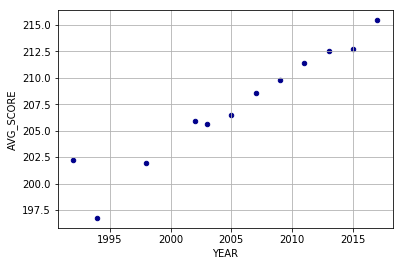

In [114]:
ax1 = dfread4.plot.scatter(x='YEAR', y='AVG_SCORE', c='DarkBlue')
ax1.grid()

Text(0.5, 1.0, 'Plot of Reading Scores vs Time for CA Education NAEP Scores')

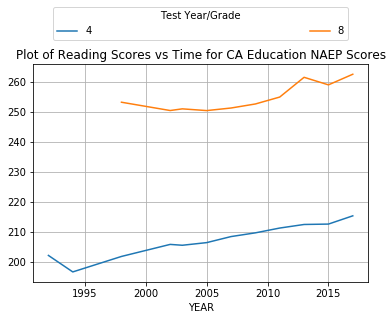

In [72]:
fig,ax= plt.subplots()
for n, group in dfread.groupby('TEST_YEAR'):
    group.plot(x='YEAR',y='AVG_SCORE', ax=ax,label=n)
    ax.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=4, mode="expand", title="Test Year/Grade",borderaxespad=2.)
plt.title('Plot of Reading Scores vs Time for CA Education NAEP Scores')

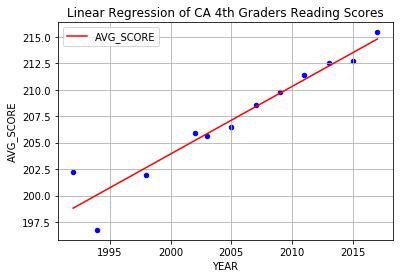

In [73]:
# ========================
# Model for Original Data
# ========================

# Get the linear models
lm_original = np.polyfit(dfread4.YEAR, dfread4.AVG_SCORE, 1)

# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_original[0] + lm_original[1]) for i in dfread4.YEAR))

# Put in to a data frame, to keep is all nice
lm_original_plot = pd.DataFrame({
'YEAR' : r_x,
'AVG_SCORE' : r_y
})
fig, ax = plt.subplots()
 
# Plot the original data and model
dfread4.plot(kind='scatter', color='Blue', x='YEAR', y='AVG_SCORE', ax=ax, title='Linear Regression of CA 4th Graders Reading Scores')
lm_original_plot.plot(kind='line', color='Red', x='YEAR', y='AVG_SCORE', ax=ax)
ax.grid()
 
plt.show()
	
# Needed to show the plots inline
%matplotlib inline

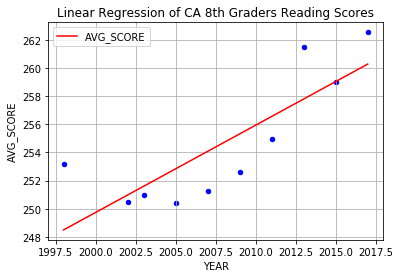

In [74]:
# ========================
# Model for Original Data
# ========================

# Get the linear models
lm_original = np.polyfit(dfread8.YEAR, dfread8.AVG_SCORE, 1)

# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_original[0] + lm_original[1]) for i in dfread8.YEAR))

# Put in to a data frame, to keep is all nice
lm_original_plot = pd.DataFrame({
'YEAR' : r_x,
'AVG_SCORE' : r_y
})

fig, ax = plt.subplots()
 
# Plot the original data and model
dfread8.plot(kind='scatter', color='Blue', x='YEAR', y='AVG_SCORE', ax=ax, title='Linear Regression of CA 8th Graders Reading Scores')
lm_original_plot.plot(kind='line', color='Red', x='YEAR', y='AVG_SCORE', ax=ax)
ax.grid()
 
plt.show()
	
# Needed to show the plots inline
%matplotlib inline

RMSE= 1.2833104688401
R^2= 0.9150720607558354


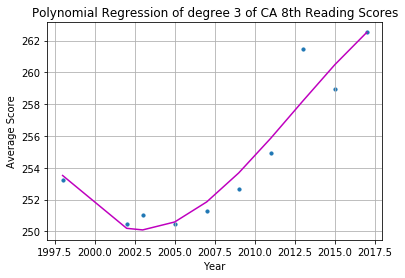

In [84]:

x = dfread8.YEAR 
y= dfread8.AVG_SCORE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE=", rmse)
print("R^2=", r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Polynomial Regression of degree 3 of CA 8th Reading Scores')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Plot of Math Scores vs Time for CA Education NAEP Scores')

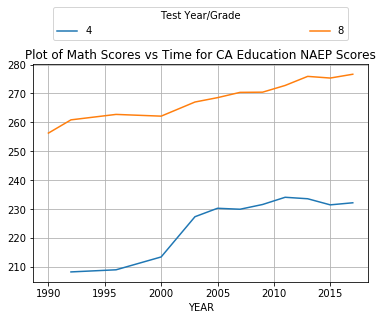

In [76]:
fig,ax= plt.subplots()
for n, group in dfmath.groupby('TEST_YEAR'):
    group.plot(x='YEAR',y='AVG_SCORE', ax=ax,label=n)
    ax.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=4, mode="expand", title="Test Year/Grade", borderaxespad=2.)
plt.title('Plot of Math Scores vs Time for CA Education NAEP Scores')

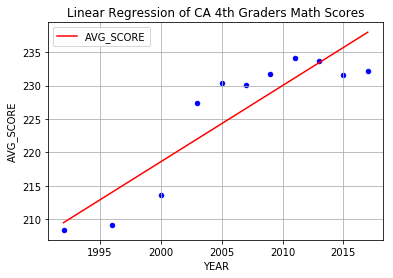

In [77]:
lm_original = np.polyfit(dfmath4.YEAR, dfmath4.AVG_SCORE, 1)

# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_original[0] + lm_original[1]) for i in dfmath4.YEAR))

# Put in to a data frame, to keep is all nice
lm_original_plot = pd.DataFrame({
'YEAR' : r_x,
'AVG_SCORE' : r_y
})

fig, ax = plt.subplots()
 
# Plot the original data and model
dfmath4.plot(kind='scatter', color='Blue', x='YEAR', y='AVG_SCORE', ax=ax, title='Linear Regression of CA 4th Graders Math Scores')
lm_original_plot.plot(kind='line', color='Red', x='YEAR', y='AVG_SCORE', ax=ax)
ax.grid()
 
plt.show()
	
# Needed to show the plots inline
%matplotlib inline

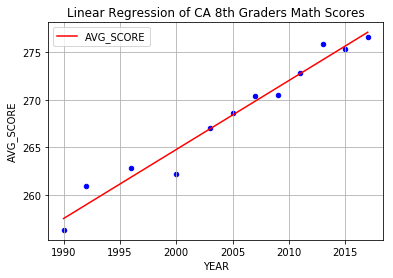

In [78]:
lm_original = np.polyfit(dfmath8.YEAR, dfmath8.AVG_SCORE, 1)

# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_original[0] + lm_original[1]) for i in dfmath8.YEAR))

# Put in to a data frame, to keep is all nice
lm_original_plot = pd.DataFrame({
'YEAR' : r_x,
'AVG_SCORE' : r_y
})

fig, ax = plt.subplots()
 
# Plot the original data and model
dfmath8.plot(kind='scatter', color='Blue', x='YEAR', y='AVG_SCORE', ax=ax, title='Linear Regression of CA 8th Graders Math Scores')
lm_original_plot.plot(kind='line', color='Red', x='YEAR', y='AVG_SCORE', ax=ax)
ax.grid()
 
plt.show()
	
# Needed to show the plots inline
%matplotlib inline

RMSE= 2.2888710654605546
R^2= 0.9430955699282201


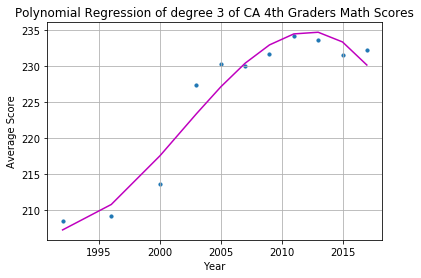

In [82]:

x = dfmath4.YEAR 
y= dfmath4.AVG_SCORE


# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE=", rmse)
print("R^2=", r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Polynomial Regression of degree 3 of CA 4th Graders Math Scores')
plt.grid(True)

plt.show()


In [86]:
dffs = pd.read_csv('../input/states_all.csv')
dffs.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [118]:
dffs = dffs[dffs['STATE'].str.contains("CALIFORNIA")] 
dffs.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,1608514.0,1944760.0,59954.0,444104.0,420233.0,380223.0,277271.0,3328627.0,1393530.0,4782111.0,NaN,NaN,NaN,NaN
106,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,6754346.0,1615630.0,1916061.0,66450.0,448237.0,426919.0,388561.0,285132.0,3372294.0,1421547.0,4860291.0,NaN,NaN,NaN,NaN
157,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,8603751.0,2181053.0,2669270.0,69182.0,472334.0,428553.0,399039.0,287428.0,3430751.0,1464841.0,4964774.0,NaN,NaN,NaN,NaN
208,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,73233.0,469965.0,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451


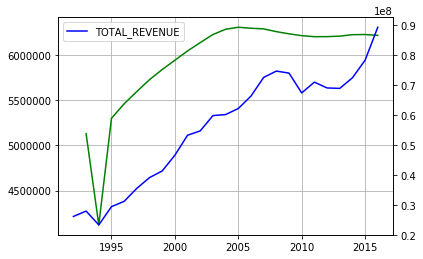

In [124]:
fig, ax1 = plt.subplots()

x = dffs['YEAR']
y1 = dffs['ENROLL']
y2 = dffs['TOTAL_REVENUE']
ax1.grid()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
plt.legend()


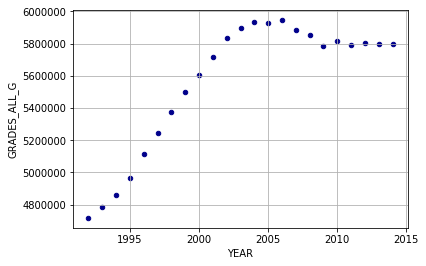

In [119]:

ax1 = dffs.plot.scatter(x='YEAR', y='GRADES_ALL_G', c='DarkBlue')
ax1.grid()

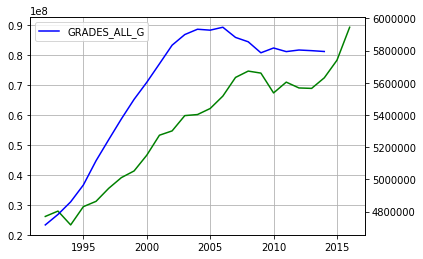

In [121]:
fig, ax1 = plt.subplots()

x = dffs['YEAR']
y1 = dffs['TOTAL_REVENUE']
y2 = dffs['GRADES_ALL_G']
ax1.grid()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
plt.legend()
